# Module 6 Part 1: ANOVA

# Introduction

This module continues the discussion of inferential statistics. The focus is on how to compare estimates (means) across many groups. We will discuss a method for analysis of binned data with the chi-squared test and goodness of fit. The last part of this module introduces bootstrapping.

Before continuing, please ensure you have a good understanding of hypothesis testing, presented in the previous module.

This module consists of 3 parts:

- **Part 1** - ANOVA Testing

- **Part 2** - Goodness of Fit

- **Part 3** - Introduction to Bootstrapping

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

# Learning Outcomes

At the end of this module, you will be able to:

- Statistically compare data from several groups
- Analyze binned data
- Evaluate the goodness of fit of distributions

Also, the concept of bootstrapping is introduced. You will be able to estimate the standard error of a population parameter when parametric assumptions are not possible.

# Readings and Resources

We invite you to further supplement the content in this module with the following recommended text:

Diez, D., Çetinkaya-Rundel, M., &  Barr, C.D. (2019).  Chapter 6: Inference for categorical data.  Chapter 7.5: Comparing many means with ANOVA. *OpenIntro Statistics (4th Ed.).* https://www.openintro.org/stat/textbook.php?stat_book=os

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-6-Part-1:-ANOVA" data-toc-modified-id="Module-6-Part-1:-ANOVA">Module 6 Part 1: ANOVA</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#ANOVA-Testing" data-toc-modified-id="ANOVA-Testing">ANOVA Testing</a></span>
<ul class="toc-item">
<li><span><a href="#Analysis-of-variance-and-the-F-test" data-toc-modified-id="Analysis-of-variance-and-the-F-test">Analysis of variance and the F-test</a></span>
</li>
<li><span><a href="#Identification-of-the-different-group" data-toc-modified-id="Identification-of-the-different-group">Identification of the different group</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# ANOVA Testing

## Analysis of variance and the F-test

Comparison of data in *two* groups was covered in the previous module. Often, we need to compare means across *many* groups. ANOVA is a special test designed for such comparisons. ANOVA stands for **analysis of variance** and it tests for an *overall* difference between various groups. With this test, we are not comparing different groups pairwise. Instead, we check whether there is evidence that at least one of the groups is statistically significantly different than the others. We will discuss which conditions need to be met and the type of corrections that should be applied for such a comparison to be considered reliable.

This approach is stricter than pairwise comparisons, since if we have many groups it is likely to find a false difference just by chance. If the result of an ANOVA test is that there *is* at least one different group, we won't know which one, and in most cases we should continue comparing groups to identify which ones are truly different. 

Essentially, ANOVA is a single hypothesis test to check whether the means across many groups are equal:

- **Null Hypothesis $H_{0}$**: The mean is the same across all groups. $\mu_{1} = \mu_{2} = \ ... \ = \mu_{i}= \ ... \ = \mu_{N}$, where $\mu_{i}$ is the mean for observations in group i.


- **Alternative Hypothesis $H_{A}$**: At least one mean is different.

We will work with a dataset containing information about the cost of living, mortgage payments, and vacation spending from 3 different cities. We are interested in whether the cost of living is significantly different across cities.

<AxesSubplot:title={'center':'Cost_Living'}, xlabel='City'>

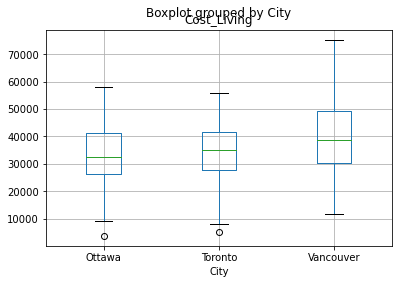

In [7]:
import pandas as pd

cr = pd.read_csv('./module06/CreditRisk.csv')
cr.boxplot('Cost_Living', by='City')

In [8]:
cr.groupby('City')['Cost_Living'].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Ottawa,100.0,33469.300000,10711.592982,3654.0,26331.0,32315.0,41209.5,57943.0
Toronto,99.0,34178.848485,11286.234153,5066.0,27667.0,34914.0,41732.0,55985.0
Vancouver,101.0,40171.603960,14328.552855,11631.0,30171.0,38772.0,49178.0,75355.0


The boxplot and table above shows that the cost of living is comparable in Ottawa and Toronto, and somewhat higher in Vancouver. To conclude if this difference is statistically significant, we have to evaluate the difference between means and compare this with the data variability. The column `std` shows the standard deviation for each city (group). In this example, the null hypothesis is that the cost of living is the same in these 3 cities and the alternative is that the cost of living is different in at least one of the cities. Although the mean is higher in Vancouver, it is hard to say that the difference is significant given the amount of data variance.

An ANOVA test answers if the difference, or variability, in _mean_ is large enough to be significant. To achieve this, the __mean square between groups__ (MSG) is calculated, which represents this difference in means. For $N$ groups we find the mean outcome across all groups $\bar{x}$ and then measure the variance of means:

$$ MSG = \frac{1}{k-1}\sum_{i=1}^{N}n_{i}(\bar{x_{i}}-\bar{x})^2$$

where $n_{i}$ is the sample size of group $i$ and $\bar{x_{i}}$  is the mean value for group $i$.

This MSG is to be compared with the variance in data, or rather the pooled variance estimate: the __mean square error__.

$$MSE = \frac{1}{n-k}((n_{1} - 1)s_{1}^2 + (n_{2} - 1)s_{2}^2 + ... + (n_{k} - 1)s_{N}^2)$$

Here $n$ is the total number of observations in all groups, $k$ is the number of groups, and $s_{i}$ is the standard deviation in group $i$.

Now, having a measure for between-group variability of mean values (MSG) and the pooled variability of data (MSE) we may introduce a test statistic for ANOVA as the ratio of MSG and MSE:

$$F = \frac{MSG}{MSE}$$

This can be thought of as the measure of mean variability in the data variance. To evaluate the hypothesis with an F-statistic, known as an __F-test__ we use an $F$ distribution. An $F$ distribution has two parameters: degrees of freedom for groups $df_{G} = k - 1$, and degrees of freedom for residuals $df_{E} = n - k$.

In our example, there are 3 groups and 300 total observations, so $df_{G} = 3 - 1 = 2$ and $df_{E} = 300 - 3 = 297$.

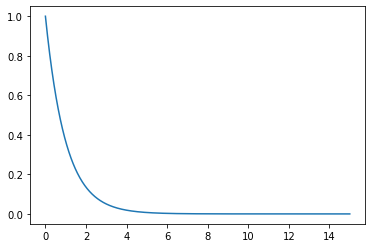

In [11]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

dfg = 3 - 1
dfe = 300 - 3

F_dist = st.f(dfg, dfe)
x = np.linspace(0, 15, 1000)

plt.plot(x, F_dist.pdf(x))

In [12]:
cr.describe()

,CC_Payments,Wage,Cost_Living,Mtg,Vacations,Ottawa,Vancouver
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,15085.173333,85327.020000,35959.893333,34264.260000,9789.563333,0.333333,0.336667
std,24142.424244,12002.180144,12550.754681,15048.593736,3133.039806,0.472192,0.473359
min,-40164.000000,59734.000000,3654.000000,10583.000000,87.000000,0.000000,0.000000
25%,-3234.750000,76953.750000,27630.750000,19554.500000,7727.000000,0.000000,0.000000
50%,11422.500000,84288.000000,35481.500000,34198.000000,10004.000000,0.000000,0.000000
75%,38863.500000,93335.750000,43542.750000,45641.250000,11960.250000,1.000000,1.000000
max,63210.000000,119703.000000,75355.000000,82760.000000,17421.000000,1.000000,1.000000


We can compute MSG and MSE manually and find the F-statistic in this case. The mean values and standard deviations in the groups are:

| ***City*** | ***Mean*** | ***Standard Deviation*** | ***# of Observations*** |
| :--- | :---: | :---: | :---: |
| **Ottawa** | 33,469.30 | 10,711.6 | 100 |
| **Toronto** | 34,178.85 | 11,286.23 | 99 |
| **Vancouver** | 40,171.60 | 14,328.55 | 101 |

The mean across all groups is 35,959.89.

In [14]:
means = [33469.30, 34178.85, 40171.60]
MSG = (1/2) * (100 * (33469.30 - 35959.89)**2 + 99 * (34178.85-35959.89)**2 + 101 * (40171.60 - 35959.89)**2)

MSE= (1/(300-3))* ((100-1)*10711.6**2 + (99-1)*11286.23**2 + (101-1)*14328.55**2)

F = MSG/MSE

p_value = 1 - F_dist.cdf(F)

print('F-statistic: ', F)
print('p-value is ', p_value)

F-statistic:  9.122685971819424
p-value is  0.00014288869770451296


We can use the Python function `f_oneway(arrays)` from the `scipy.stats` package to find the F-statistic and p-value. This function takes arrays of data to compare and returns the F-statistic and p-value.

It is called `f-oneway`, indicating that the ANOVA test we use here is one-way because all groups are from a single categorical variable (in this example `City`). However, more complex two-way ANOVA tests exist for when we need to compare groups formed by two categorical variables.

In [15]:
st.f_oneway(cr['Cost_Living'][cr['City'] == 'Ottawa'],
            cr['Cost_Living'][cr['City'] == 'Toronto'], 
            cr['Cost_Living'][cr['City'] == 'Vancouver'])

F_onewayResult(statistic=9.122698525277459, pvalue=0.0001428870077835352)

The larger the observed variability in the means relative to within-group observation variances (MSE), the larger the F value will be and will provide stronger evidence against the null hypothesis. The upper tail of the F-distribution is used to compute the p-value. For our example, we find a large F-value and a fairly small p-value of 0.000143 &mdash; much smaller than the default significance level 0.05. Thus, the null hypothesis can be rejected and we conclude that at least one group is different from the rest.

Before performing an ANOVA test, **three data conditions** must be confirmed:

1. The observations are independent within and across groups.<br><br>
2. The data within each group is nearly normal.<br><br>
3. Variability across the groups is about equal.

Inspecting the boxplot, we see that the data is not strongly skewed, so we can assume that the data within groups is nearly normal. Also, we see that there is not a big difference between standard deviations of each group. For the first condition about independence, we may safely assume that observations are independent if we analyze a rather small sample, much smaller than 10% of the population.

## Identification of the different group

The ANOVA test showed that there is one group which is different from the rest, and now we want to find which one is different. Even though for 3 groups it might not be that difficult to spot the group, we need to apply an established statistical method that is general and may be applied for any number of groups. Here, we applied a pairwise group comparison using a two-sample t-test, but we used a __modified significance level__ and a __pooled estimate of the standard deviation__ across groups. These modifications were introduced to mitigate the risk of finding false differences between groups.

There are a few different methods, but the Bonferroni method is the most popular and fastest method. It uses a stricter significance level, predefined as $\alpha$ divided by the number of all possible pairs. For $k$ groups we will have $K = k(k-1)/2$ pairs and a modified significance level of $\alpha/K$. This is called a __Bonferroni correction__. Also, in this method, a pooled standard deviation is used, which is computed in the exact same way as MSE for an ANOVA test.

To run a comparison of cost of living in Ottawa, Toronto and Vancouver:

1. Find the difference of means $D$<br><br>

2. Calculate the standard error with pooled standard deviation $s$ and sample sizes: $SE =(\frac{s^2}{n_{1}} + \frac{s^2}{n_{2}})^{1/2}$<br><br>

3. Find the p-value of $D/SE$ for a two-tail test using a t-distribution with the smallest degree of freedom for the pair<br><br>

4. Compare the p-value with the Bonferroni corrected significance level $\frac{\alpha}{K}$

This can be performed in Python as follows:

In [16]:
import statsmodels.stats.multicomp as mc

comparisons = mc.MultiComparison(cr['Cost_Living'], cr['City'])
table, arr1, arr2 = comparisons.allpairtest(st.ttest_ind,  method='bonf')

table

group1,group2,stat,pval,pval_corr,reject
Ottawa,Toronto,-0.4549,0.6497,1.0,False
Ottawa,Vancouver,-3.7531,0.0002,0.0007,True
Toronto,Vancouver,-3.2815,0.0012,0.0037,True


**End of Part 1**

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

# References

Diez, D., Çetinkaya-Rundel, M., & Barr, C.D. (2019). Chapter 7.5: Comparing many means with ANOVA. _OpenIntro Statistics_ (4th Ed.). https://www.openintro.org/stat/textbook.php?stat_book=os